## Stock Price Prediction (NSE-Tata-Global-Beverages-Limited)

In [1]:
# Import Liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load Data
data = pd.read_csv('NSE-Tata-Global-Beverages-Limited.csv')

In [3]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,08-10-2018,208.00,222.25,206.85,216.00,215.15,4642146,10062.83
1,05-10-2018,217.00,218.60,205.90,210.25,209.20,3519515,7407.06
2,04-10-2018,223.50,227.80,216.15,217.25,218.20,1728786,3815.79
3,03-10-2018,230.00,237.50,225.75,226.45,227.60,1708590,3960.27
4,01-10-2018,234.55,234.60,221.05,230.30,230.90,1534749,3486.05


In [4]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1230,14-10-2013,160.85,161.45,157.70,159.3,159.45,1281419,2039.09
1231,11-10-2013,161.15,163.45,159.00,159.8,160.05,1880046,3030.76
1232,10-10-2013,156.00,160.80,155.85,160.3,160.15,3124853,4978.80
1233,09-10-2013,155.70,158.20,154.15,155.3,155.55,2049580,3204.49
1234,08-10-2013,157.00,157.80,155.20,155.8,155.80,1720413,2688.94


In [5]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   int64  
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 77.3+ KB


In [6]:
# Lets check data distribution
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [7]:
# Check Nulls
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [8]:
# Check number of unique values in each columns
data.nunique()

Date                    1235
Open                     799
High                     863
Low                      854
Last                     865
Close                    893
Total Trade Quantity    1234
Turnover (Lacs)         1231
dtype: int64

<AxesSubplot:>

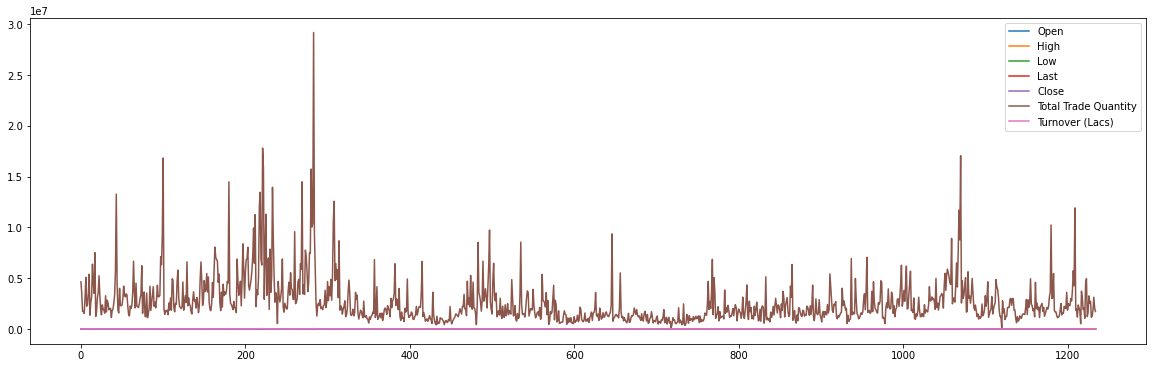

In [9]:
data.plot(figsize=(20,6))

<AxesSubplot:>

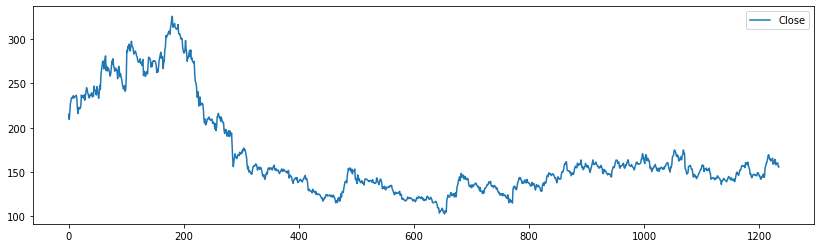

In [10]:
df1 = pd.DataFrame()
df1 = data[['Close']]
df1.plot(figsize=(14,4))

In [11]:
# Apply Label Encoding on Date column
# Import Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
data['Date'].head()

0    08-10-2018
1    05-10-2018
2    04-10-2018
3    03-10-2018
4    01-10-2018
Name: Date, dtype: object

In [13]:
# Use on Date column
# Fit
le.fit(data['Date'])

LabelEncoder()

In [14]:
# Fit Transform
data['Date']=le.fit_transform(data['Date'])

In [15]:
# Check data
data['Date'].head()

0    314
1    191
2    150
3    108
4     30
Name: Date, dtype: int32

In [16]:
# Drop Close column
x = data.drop(columns='Close')
x.head()

,Date,Open,High,Low,Last,Total Trade Quantity,Turnover (Lacs)
0,314,208.00,222.25,206.85,216.00,4642146,10062.83
1,191,217.00,218.60,205.90,210.25,3519515,7407.06
2,150,223.50,227.80,216.15,217.25,1728786,3815.79
3,108,230.00,237.50,225.75,226.45,1708590,3960.27
4,30,234.55,234.60,221.05,230.30,1534749,3486.05


In [17]:
x.shape

(1235, 7)

In [18]:
# Split data in x and y (independent features and dependent features)
y = data['Close'].copy()
y.head()

0    215.15
1    209.20
2    218.20
3    227.60
4    230.90
Name: Close, dtype: float64

In [19]:
y.shape

(1235,)

In [20]:
# Split Data
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [21]:
xtrain.shape,ytrain.shape

((988, 7), (988,))

In [22]:
xtest.shape,ytest.shape

((247, 7), (247,))

In [23]:
# Prepare Model
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [26]:
lr.intercept_

0.19288227210290643

In [27]:
lr.coef_

array([-6.90513784e-05, -6.80063278e-02,  8.71285315e-02,  9.68459975e-02,
        8.83363403e-01, -3.40158896e-08,  8.76973363e-06])

In [28]:
# Let predict xtest
pred = lr.predict(xtest)

In [29]:
len(pred)

247

In [30]:
pred

array([142.61092057, 264.82646718, 140.34047249, 119.39912312,
       139.58299846, 124.02471737, 150.81202681, 117.38030215,
       151.6419588 , 120.66974338, 120.02819694, 120.80793247,
       234.67646375, 288.9051467 , 127.0056716 , 161.31836644,
       126.85324372, 162.34193689, 233.2741229 , 137.42839985,
       155.62723111, 128.66199059, 156.27952092, 142.36695119,
       122.03934661, 118.15220333, 146.71008159, 157.74958153,
       142.73881164, 157.40935374, 137.01821488, 151.24016344,
       129.62271772, 275.46843778, 120.49909593, 162.44326661,
       113.64743676, 139.94009307, 142.91371595, 167.64176927,
       138.68092559, 193.32681129, 136.97091295, 132.70714867,
       156.33079647, 163.62437161, 284.33649327, 170.5156596 ,
       121.14412693, 152.96870157, 152.0048204 , 119.57331669,
       211.71624072, 133.88263061, 134.58143886, 116.02292289,
       237.82007351, 127.00351913, 161.67542473, 135.81235509,
       171.26106477, 152.63823817, 265.53878777, 142.18

In [31]:
pred_df = pd.DataFrame(pred)

In [32]:
# Predicted Values
pred_df.head()

,0
0,142.610921
1,264.826467
2,140.340472
3,119.399123
4,139.582998


In [33]:
# Actual Values
ytest.head()

516     142.20
69      267.35
1141    140.35
604     119.45
537     139.10
Name: Close, dtype: float64

In [34]:
# Get Error
from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_squared_log_error

In [35]:
mae = mean_absolute_error(ytest,pred_df)
print('Mean Absolute Error:',mae)

Mean Absolute Error: 0.3155468586235472


In [36]:
mse = mean_squared_error(ytest,pred_df)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.19560549854503922


In [37]:
msle = mean_squared_log_error(ytest,pred_df)
print('Mean Squared Log Error:', msle)

Mean Squared Log Error: 6.2240854330439265e-06


# ARIMA and Seasonal ARIMA

### Autoregressive Integrated Moving Average 

In [38]:
df = pd.read_csv('NSE-Tata-Global-Beverages-Limited.csv')

In [39]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,08-10-2018,208.00,222.25,206.85,216.00,215.15,4642146,10062.83
1,05-10-2018,217.00,218.60,205.90,210.25,209.20,3519515,7407.06
2,04-10-2018,223.50,227.80,216.15,217.25,218.20,1728786,3815.79
3,03-10-2018,230.00,237.50,225.75,226.45,227.60,1708590,3960.27
4,01-10-2018,234.55,234.60,221.05,230.30,230.90,1534749,3486.05


In [40]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1230,14-10-2013,160.85,161.45,157.70,159.3,159.45,1281419,2039.09
1231,11-10-2013,161.15,163.45,159.00,159.8,160.05,1880046,3030.76
1232,10-10-2013,156.00,160.80,155.85,160.3,160.15,3124853,4978.80
1233,09-10-2013,155.70,158.20,154.15,155.3,155.55,2049580,3204.49
1234,08-10-2013,157.00,157.80,155.20,155.8,155.80,1720413,2688.94


In [41]:
df1 =df.drop(columns=['Close','Date'])
df1.head()

,Open,High,Low,Last,Total Trade Quantity,Turnover (Lacs)
0,208.00,222.25,206.85,216.00,4642146,10062.83
1,217.00,218.60,205.90,210.25,3519515,7407.06
2,223.50,227.80,216.15,217.25,1728786,3815.79
3,230.00,237.50,225.75,226.45,1708590,3960.27
4,234.55,234.60,221.05,230.30,1534749,3486.05


In [42]:
data = df[['Close','Date']].copy()
data.head()

,Close,Date
0,215.15,08-10-2018
1,209.20,05-10-2018
2,218.20,04-10-2018
3,227.60,03-10-2018
4,230.90,01-10-2018


In [43]:
# Convert Date into Datetime
data['Date']=pd.to_datetime(data['Date'])

C:\Users\HP\AppData\Local\Temp\ipykernel_13020\1323715783.py:2: UserWarning: Parsing '28-09-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date']=pd.to_datetime(data['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_13020\1323715783.py:2: UserWarning: Parsing '27-09-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date']=pd.to_datetime(data['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_13020\1323715783.py:2: UserWarning: Parsing '26-09-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date']=pd.to_datetime(data['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_13020\1323715783.py:2: UserWarning: Parsing '25-09-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date']=pd.to_datetime(data['Date'])
C:\Users\HP\AppData\Local\Temp\ipyke

In [44]:
data.set_index('Date',inplace=True)

In [45]:
data.head()

,Close
Date,
2018-08-10,215.15
2018-05-10,209.20
2018-04-10,218.20
2018-03-10,227.60
2018-01-10,230.90


In [46]:
data.sort_values(by=['Date'],inplace=True)
data.head()

,Close
Date,
2013-01-11,167.70
2013-02-12,149.30
2013-03-11,169.50
2013-03-12,146.80
2013-04-12,145.55


In [47]:
data.describe()

,Close
count,1235.000000
mean,168.731053
std,51.544928
min,102.650000
25%,137.225000
50%,151.100000
75%,169.500000
max,325.750000


## step 2: Visualize the Data

<AxesSubplot:xlabel='Date'>

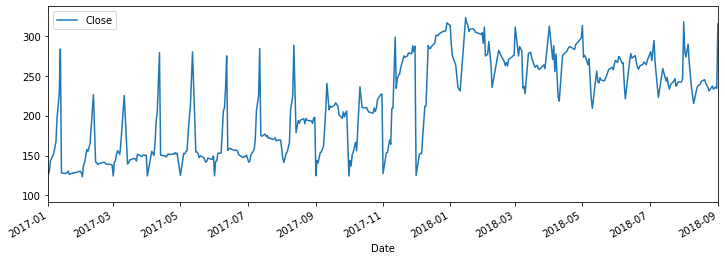

In [48]:
data.plot(xlim=['2017-01-01','2018-09-01'],figsize=(12,4))

In [49]:
## Testing for stationarity

from statsmodels.tsa.stattools import adfuller

In [50]:
test_result=adfuller(data['Close'])

In [51]:
# Ho: It is non stationary
# H1: It is stationary

def adfuller_test(close):
    result=adfuller(close)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+':'+str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Date has no unit root and is stationary")
    else:
        print('Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary')

In [52]:
adfuller_test(data['Close'])

ADF Test Statistic:0.25828933839510865
p-value:0.9753477809514834
#Lags Used:23
Number of Observations Used:1211
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


## Differencing

In [53]:
data['Close First Difference'] = data['Close'] - data['Close'].shift(1)

In [54]:
data.head()

,Close,Close First Difference
Date,,
2013-01-11,167.70,NaN
2013-02-12,149.30,-18.40
2013-03-11,169.50,20.20
2013-03-12,146.80,-22.70
2013-04-12,145.55,-1.25


In [55]:
data['Seasonal First Difference'] = data['Close'] - data['Close'].shift(12)

In [56]:
data.head(14)

,Close,Close First Difference,Seasonal First Difference
Date,,,
2013-01-11,167.70,NaN,NaN
2013-02-12,149.30,-18.40,NaN
2013-03-11,169.50,20.20,NaN
2013-03-12,146.80,-22.70,NaN
2013-04-12,145.55,-1.25,NaN
2013-05-11,167.60,22.05,NaN
2013-05-12,146.65,-20.95,NaN
2013-06-11,163.55,16.90,NaN
2013-06-12,146.20,-17.35,NaN


In [57]:
data.tail()

,Close,Close First Difference,Seasonal First Difference
Date,,,
2018-12-03,276.05,-9.05,-9.20
2018-12-04,273.85,-2.20,-0.90
2018-12-06,267.60,-6.25,34.05
2018-12-07,265.20,-2.40,43.20
2018-12-09,222.65,-42.55,-90.65


In [58]:
# Again test dickey fuller test
adfuller_test(data['Seasonal First Difference'].dropna())

ADF Test Statistic:-8.810062658644574
p-value:2.0025344095776508e-14
#Lags Used:23
Number of Observations Used:1199
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Date has no unit root and is stationary


<AxesSubplot:xlabel='Date'>

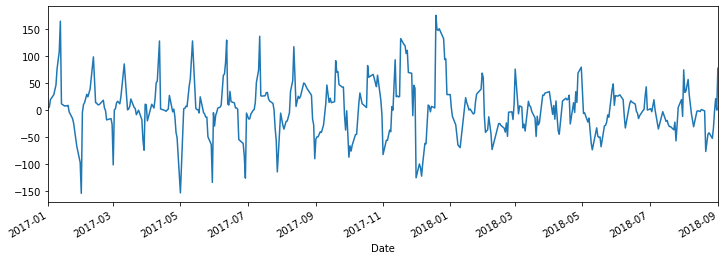

In [59]:
data['Seasonal First Difference'].plot(xlim=['2017-01-01','2018-09-01'],figsize=(12,4))

## Auto Regressive Model

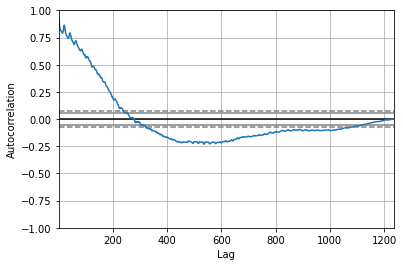

In [60]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Close'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

In [61]:
import statsmodels.api as sm

In [62]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


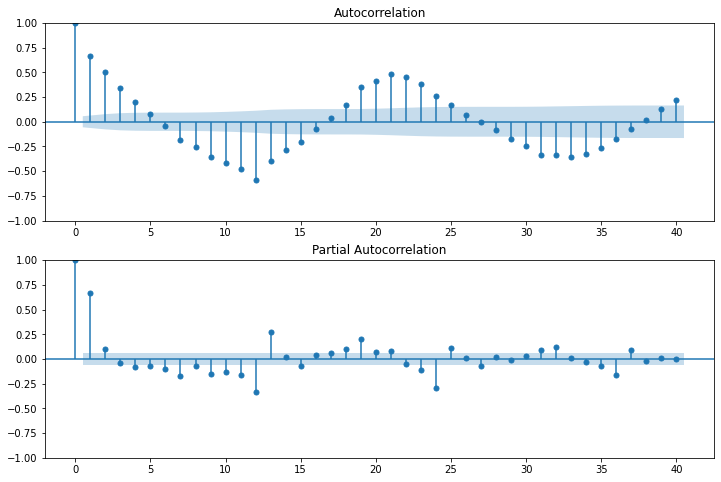

In [63]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [64]:
# For non-seasonal data
# p=1, d=1, q = 0 or 1
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [65]:
model=ARIMA(data['Close'],order=(3,1,5))
model_fit=model.fit()

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed 

In [66]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1235
Model:                 ARIMA(3, 1, 5)   Log Likelihood               -5206.555
Date:                Wed, 19 Oct 2022   AIC                          10431.110
Time:                        13:01:07   BIC                          10477.172
Sample:                             0   HQIC                         10448.437
                               - 1235                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7093   1131.421      0.001      0.999   -2216.834    2218.253
ar.L2          0.9122   1920.436      0.000      1.000   -3763.073    3764.897
ar.L3         -0.7558    865.466     -0.001      0.999   -1697.038    1695.526
ma.L1         -1.1151   1131.421     -0.001      0.999   -2218.660    2216.430
ma.L2         -0.7287   2379.623     -0.000      1.000   -4664.703    4663.246
ma.L3          1.0758   1526.854      0.001      0.999   -2991.504    2993.655
ma.L4         -0.2306    291.547     -0.001      0.999    -571.652     571.191
ma.L5          0.0238     27.229      0.001      0.999     -53.344      53.392
sigma2       266.8677      4.511     59.156      0.000     258.026     275.710
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):             10534.99
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):              11.80   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

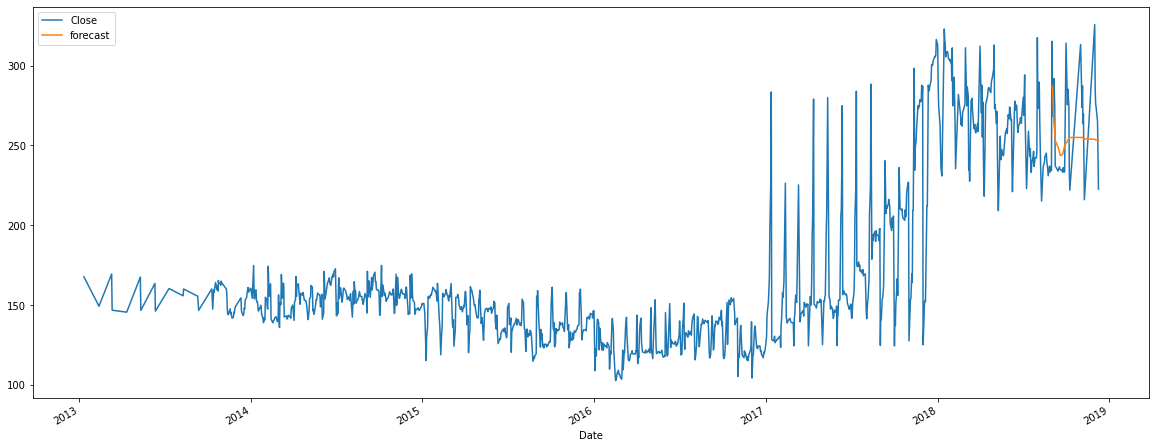

In [67]:
data['forecast']=model_fit.predict(start=1200,end=1234,dynamic=True)
data[['Close','forecast']].plot(figsize=(20,8))

In [68]:
model=sm.tsa.statespace.SARIMAX(data['Close'],order=(3,1,5),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameter

<AxesSubplot:xlabel='Date'>

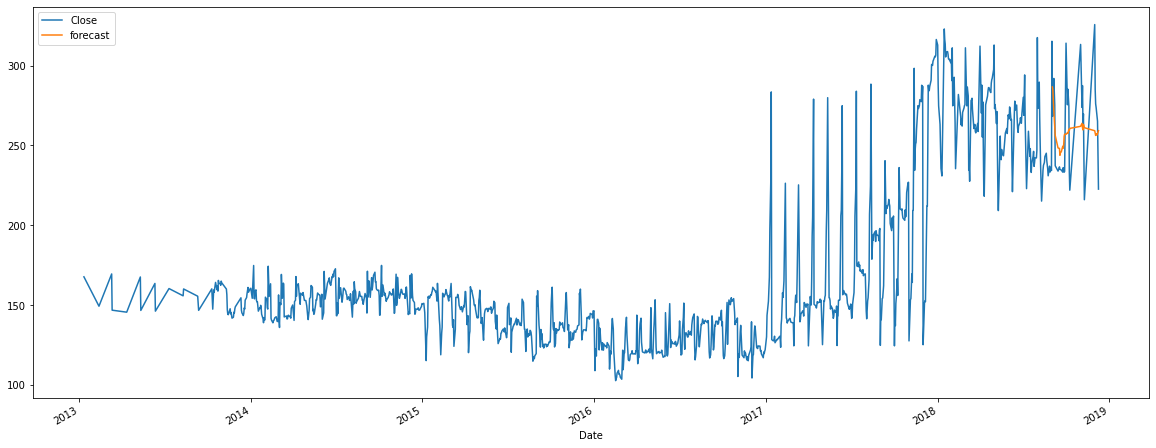

In [69]:
data['forecast']=results.predict(start=1200,end=1234,dynamic=True)
data[['Close','forecast']].plot(figsize=(20,8))

In [85]:
from pandas.tseries.offsets import DateOffset
future_data=[data.index[-1]+DateOffset(months=x)for x in range(0,60)]

In [86]:
future_dates_data=pd.DataFrame(index=future_data[1:],columns=data.columns)

In [87]:
future_dates_data

,Close,Close First Difference,Seasonal First Difference,forecast
2019-01-09,NaN,NaN,NaN,NaN
2019-02-09,NaN,NaN,NaN,NaN
2019-03-09,NaN,NaN,NaN,NaN
2019-04-09,NaN,NaN,NaN,NaN
2019-05-09,NaN,NaN,NaN,NaN
2019-06-09,NaN,NaN,NaN,NaN
2019-07-09,NaN,NaN,NaN,NaN
2019-08-09,NaN,NaN,NaN,NaN
2019-09-09,NaN,NaN,NaN,NaN
2019-10-09,NaN,NaN,NaN,NaN


In [94]:
df = pd.DataFrame(data)
df1 = pd.DataFrame(future_dates_data)

In [95]:
#future_data=pd.concat([data,future_dates_data])
future_data=pd.concat([df,df1])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:>

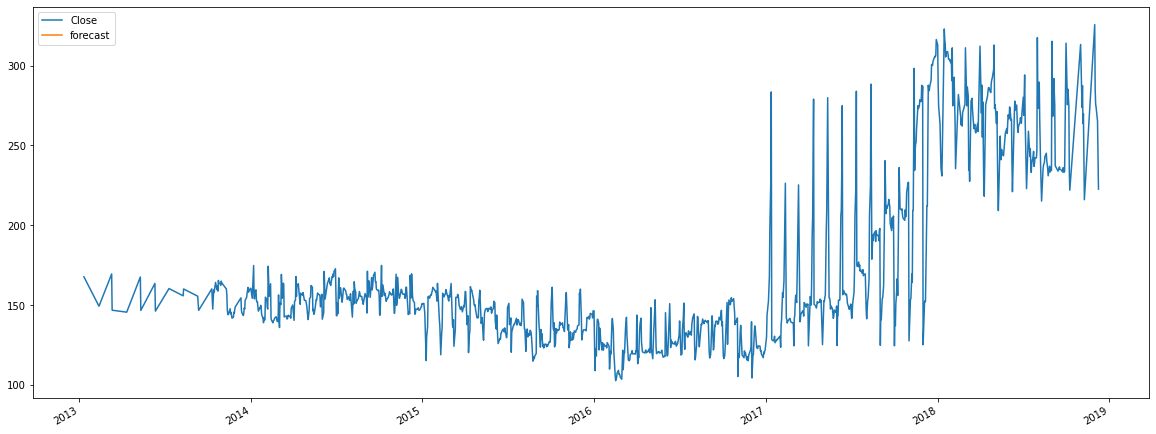

In [96]:
future_data['forecast'] = results.predict(start = 1234, end = 1300, dynamic= True)
future_data[['Close',"forecast"]].plot(figsize=(20,8))